In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
#from jupyterthemes import jtplot
#jtplot.style()
#jtplot.style(theme='onedork')
import random
from datetime import datetime
%matplotlib inline

# Implementacja LFG i generowanie rozkładu normlanego na ich podstawie

Text(0.5,0,'Średnia z próbek')

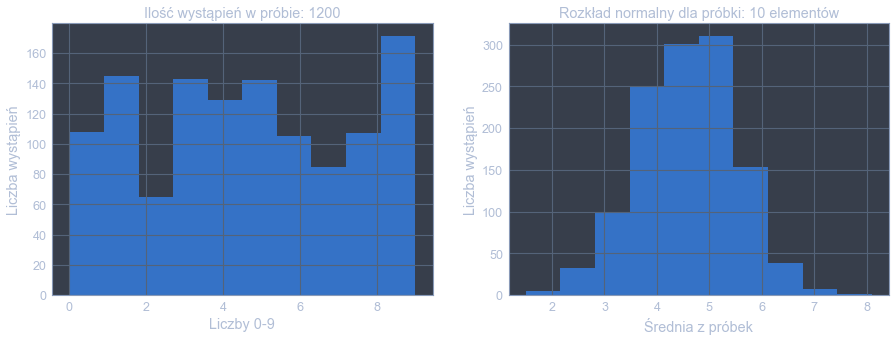

In [13]:
# generowanie liczb losowych na podstawie LFG

LFGpop = 1200 # wielkość populacji

# losowy wiersz początkowy na podstawie milisekund
millis = int(round(time.time() * 1000))
seed = list(map(int, str(millis)))
seed7 = seed[-7:]

# algorytm LFG
j = 3
k = 7
s = seed7

abc =[]

for n in range(int(LFGpop)):

   for i in range(len(s)):
       if i is 0:
           out = (s[j-1] + s[k-1]) % 10 # the pseudorandom output

       elif 0 < i < 6:
           s[i] = s[i+1] # shift the array

       else:
           s[i] = out
           #print(s[i])
           abc.append(s[i]) #

# wybieranie próbek do rozkładu normlanego z listy LFG

LFGsample = 10 #wielkość próbki
cba = []
x2=0

while x2 < len(abc):
   avg = (sum(random.sample(abc,LFGsample)))/LFGsample
   cba.append( avg )
   x2+=1

# wykresy
plt.rcParams['axes.grid'] = True
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)


ax.hist(abc)
ax.title.set_text("Ilość wystąpień w próbie: " + str(LFGpop))
ax.set_ylabel("Liczba wystąpień")
ax.set_xlabel("Liczby 0-9")

ax2.hist(cba)
ax2.title.set_text("Rozkład dla próbki: " + str(LFGsample) + " elementów")
ax2.set_ylabel("Liczba wystąpień")
ax2.set_xlabel("Średnia z próbek")

# Generowanie liczb losowych Pythona i generowanie rozkładu normalnego na ich podstawie

Text(0.5,0,'Średnia z próbek')

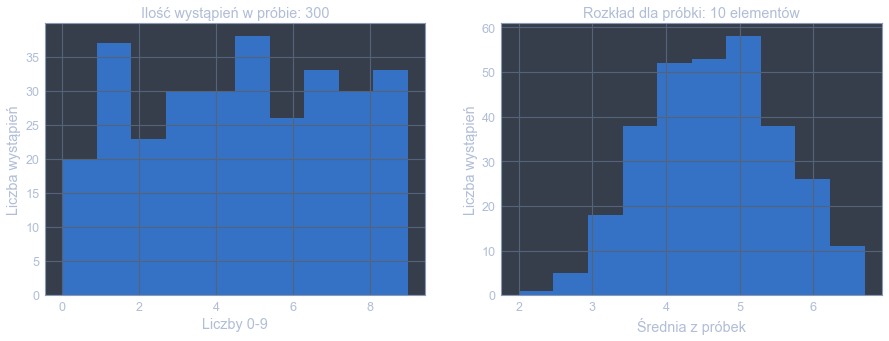

In [14]:
# generowanie liczb losowych Pythona
PythPop= 300
mylist = []

for i in range(0,int(PythPop)):
    pyth = random.randint(0,9)
    mylist.append(pyth)

# wybieranie próbek do rozkładu normlanego z listy Pythona

PythSample = 10
cba2 = []
x3=0

while x3 < len(mylist):
   avg = (sum(random.sample(mylist,PythSample )))/PythSample 
   cba2.append( avg )
   x3+=1

# wykresy

f = plt.figure(figsize=(15,5))
ax3 = f.add_subplot(121)
ax4 = f.add_subplot(122)

ax3.hist(mylist)
ax3.title.set_text("Ilość wystąpień w próbie: " + str(PythPop))
ax3.set_ylabel("Liczba wystąpień")
ax3.set_xlabel("Liczby 0-9")

ax4.hist(cba2)
ax4.title.set_text("Rozkład dla próbki: " + str(PythSample) + " elementów")
ax4.set_ylabel("Liczba wystąpień")
ax4.set_xlabel("Średnia z próbek")

# Testowanie rozkładów

T-Student dla niezależnych grup 

In [15]:
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import t

In [17]:
# źródło https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(cba, cba2, alpha):
    # calculate means
    mean1, mean2 = mean(cba), mean(cba2)
    # calculate standard errors
    se1, se2 = stats.sem(cba), stats.sem(cba2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(cba) + len(cba2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

alpha = 0.05
t_stat, df, cv, p = independent_ttest(cba, cba2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal. T_stat <= cv')
else:
    print('Reject the null hypothesis that the means are equal. T_stat > cv')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal. p > alpha')
else:
    print('Reject the null hypothesis that the means are equal. p <= alpha')

t=-1.799, df=1498, cv=1.646, p=0.072
Reject the null hypothesis that the means are equal. T_stat > cv
Accept null hypothesis that the means are equal. p > alpha
